In [1]:
from alpaca.uvmodels import model_library
import sympy as sp
from IPython import display # pretty printing in jupyter. Does not work on regular python

## Matching of UV models to ALP Lagrangian

In [11]:
charge = sp.symbols(r'\mathcal{X}')
charge_u = sp.symbols(r'\mathcal{X}_u')
charge_d = sp.symbols(r'\mathcal{X}_d')

### KSVZ-like models

Models from [1610.07593](https://arxiv.org/abs/1610.07593) to check we obtain the same results

In [16]:
R1 = model_library.fermion('3','1',sp.Rational(-1,3),charge)
R2 = model_library.fermion('3','1',sp.Rational(2,3),charge)
R3 = model_library.fermion('3','2',sp.Rational(1,6),charge)
R4 = model_library.fermion('3','2',sp.Rational(-5,6),charge)
R5 = model_library.fermion('3','2',sp.Rational(7,6),charge)
R6 = model_library.fermion('3','3',sp.Rational(-1,3),charge)
R7 = model_library.fermion('3','3',sp.Rational(2,3),charge)
R8 = model_library.fermion('3','3',sp.Rational(-4,3),charge)
R9 = model_library.fermion('6_bar','1',sp.Rational(-1,3),charge)
R10 = model_library.fermion('6_bar','1',sp.Rational(2,3),charge)
R11 = model_library.fermion('6_bar','2',sp.Rational(1,6),charge)
R12 = model_library.fermion('8','1',-1,charge)
R13 = model_library.fermion('8','2',sp.Rational(-1,2),charge)
R14 = model_library.fermion('15','1',sp.Rational(-1,3),charge)
R15 = model_library.fermion('15','1',sp.Rational(2,3),charge)

list_of_fermions=[R1,R2,R3,R4,R5,R6,R7, R8, R9, R10, R11, R12, R13, R14, R15]

In [17]:
list_of_KSVZ_models: list[model_library.KSVZ_model] = []
for i, fermion in enumerate(list_of_fermions):
    name = 'R' + str(i+1)
    list_of_KSVZ_models.append(model_library.KSVZ_model(name, [fermion]))
text = ''
for models in list_of_KSVZ_models:
   text += models.model_name + '\n' + r'\\' #+ '\n~' + r'\\' + '\n'
   text += models.couplings_latex() + '\n' + r'\\' + '\n'
   text += r'E/N = ' + str(models.E_over_N()) + '\n' + r'\\' + '\n~' + r'\\' + '\n'
display.Math(text)

<IPython.core.display.Math object>

### DFSZ-like models

Models from [1705.05370](https://arxiv.org/abs/1705.05370) to check we obtain the same results

In [18]:
DFSZ1 = model_library.model('DFSZ-I', {'eR': charge, 'uR': charge, 'dR': charge})
DFSZ2 = model_library.model('DFSZ-II', {'eR': -charge, 'uR': charge, 'dR': charge})
DFSZ3a = model_library.model('DFSZ-IIIa', {'eR': -(2*charge_u+charge_d), 'uR': charge_u, 'dR': charge_d})
DFSZ3b = model_library.model('DFSZ-IIIb', {'eR': charge_d,  'uR': charge_u, 'dR': charge_d})
DFSZ3c = model_library.model('DFSZ-IIIc', {'eR': charge_u+2*charge_d, 'uR': charge_u, 'dR': charge_d})
DFSZ3d = model_library.model('DFSZ-IIId', {'eR': -charge_u, 'uR': charge_u, 'dR': charge_d})

list_of_DFSZ_models=[DFSZ1, DFSZ2, DFSZ3a, DFSZ3b, DFSZ3c, DFSZ3d]

In [19]:
text = ''
for models in list_of_DFSZ_models:
   text += models.model_name + '\n' + r'\\' #+ '\n~' + r'\\' + '\n'
   text += models.couplings_latex() + '\n' + r'\\' + '\n'
   text += r'E/N = ' + str(models.E_over_N()) + '\n' + r'\\' + '\n~' + r'\\' + '\n'
display.Math(text)

<IPython.core.display.Math object>

## Fit to models

Fit of quarkonia decays to QED-DFSZ model

In [22]:
from alpaca import ALPcouplings, branching_ratio
from alpaca.experimental_data.measurements_exp import belle_Y1S_mumu
from alpaca.constants import metap, mmu, mtau, mc
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})

In [3]:
@np.vectorize
def chi2(ma, couplings, fa):
    exp = belle_Y1S_mumu(ma)
    c2 = 0
    if exp[2] != 0:
        br = branching_ratio('Y(1S) -> gamma mu mu', ma, couplings, fa, integrator='no_rge')
        c2 += (br-exp[0])**2/exp[2]**2
    return c2

In [13]:
ma = np.logspace(-1, 1, 80)
fa = np.logspace(2, 5, 50)
x_ma, y_fa = np.meshgrid(ma, fa)
x_ma, y_fainv = np.meshgrid(ma, 1/fa)

In [6]:
get_couplings = np.vectorize(lambda f: model_library.QED_DFSZ.get_couplings({model_library.beta: np.pi/4}, f).match_run(10, 'VA_below', matching_scale=80))

couplings = get_couplings(fa)

/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/scipy/integrate/_ivp/base.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)
/home/jorge/Documents/alpaca/alp-aca/alpaca/rge/classes.py:235: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cG': float(array[53]), "cgamma": float(array[54])}


In [14]:
x_ma, y_couplings = np.meshgrid(ma, couplings)

In [15]:
mesh_chi2 = chi2(x_ma, y_couplings, y_fa)

/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


Text(0.5, 1.0, 'QED-DFSZ $\\tan\\beta=1$:\t\t$\\Upsilon(1S)\\to \\gamma\\mu^+\\mu^-$, Belle')

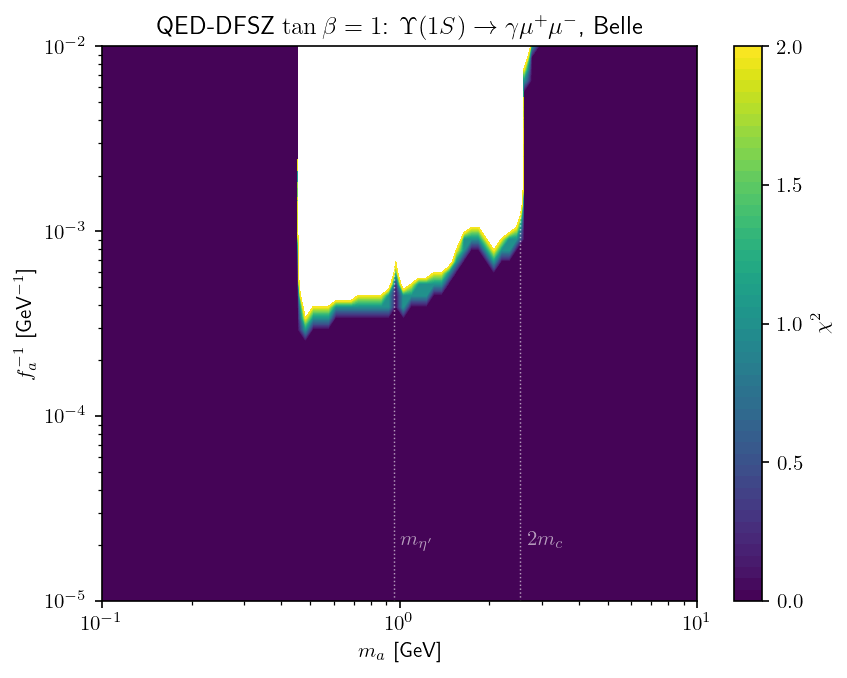

In [51]:
plt.figure(dpi=150)
plt.contourf(x_ma, y_fainv, mesh_chi2, levels=np.linspace(0, 2, 50), cmap='viridis')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cbar = plt.colorbar()
cbar.set_label(r'$\chi^2$')
cbar.set_ticks(np.linspace(0, 2, 5))
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.axvline(metap, c='w', lw=0.7, ls=':', alpha=0.6)
plt.annotate(r"$m_{\eta'}$", (1, 2e-5), color='w', alpha=0.6)
plt.axvline(2*mc, c='w', lw=0.7, ls=':', alpha=0.6)
plt.annotate(r"$2m_c$", (2.7, 2e-5), color='w', alpha=0.6)
plt.title(r'QED-DFSZ $\tan\beta=1$:' + '\t\t' + r'$\Upsilon(1S)\to \gamma\mu^+\mu^-$, Belle')